<a href="https://colab.research.google.com/github/lelouch0204/Pneumonia-X-Ray-Dataset/blob/main/pneumonia_X_rays_Resnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 40.9MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [ ]:
base_dir = 'drive/My Drive/Datasets/Pneumonia X Ray'
path = Path(base_dir)

In [ ]:
path.ls()

[PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/train'),
 PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/val'),
 PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/test')]

In [ ]:
train_data = path/'train'
test_data = path/'test'
val_data = path/'val'
train_data, test_data, val_data

(PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/train'),
 PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/test'),
 PosixPath('drive/My Drive/Datasets/Pneumonia X Ray/val'))

torch.Size([3, 592, 1032])

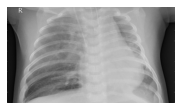

In [ ]:
img = open_image(train_data/'PNEUMONIA'/'person4_bacteria_14.jpeg')
img.show()
img.data.shape

In [ ]:
bs = 64

In [ ]:
arch1 = models.resnet34

In [ ]:
tfms = get_transforms()

In [ ]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='val', test='test', size=256, bs=bs, ds_tfms=tfms).normalize(imagenet_stats)

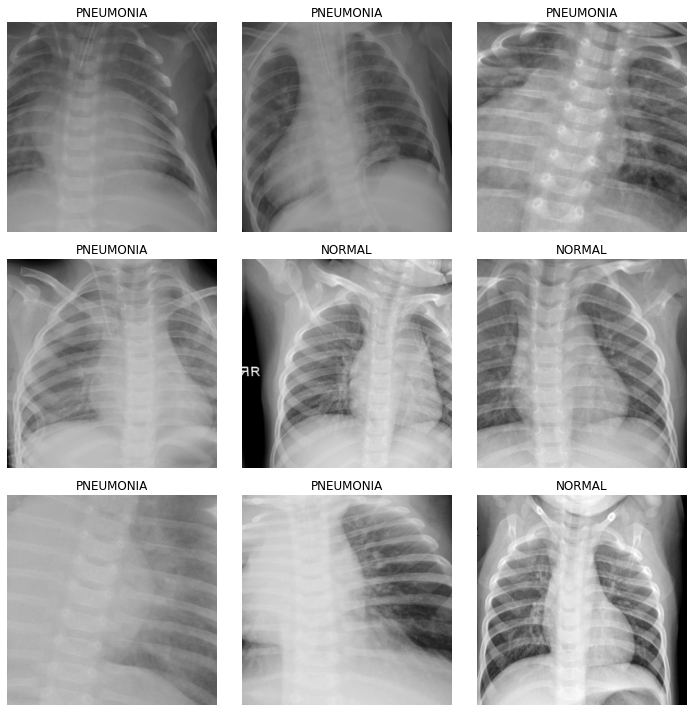

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.test_ds), len(data.valid_ds)

(['NORMAL', 'PNEUMONIA'], 2, 5216, 624, 16)

In [ ]:
learn = cnn_learner(data=data, base_arch=arch1, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.460748,0.739033,0.187500,29:14
1,0.259852,0.470489,0.250000,03:57
2,0.183148,0.556381,0.187500,04:00
3,0.144473,0.440934,0.187500,03:57


In [ ]:
learn.save('stage-1')

In [ ]:
learn.freeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.32E-05


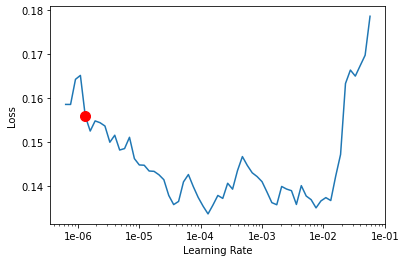

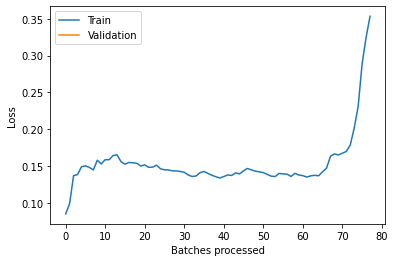

In [ ]:
learn.recorder.plot(suggestion=True)
learn.recorder.plot_losses()

In [ ]:
lr = slice(3e-5, 3e-4)

In [ ]:
learn.fit_one_cycle(10, max_lr=lr, wd=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,0.137192,0.390969,0.125000,03:48
1,0.135908,0.305845,0.125000,03:45
2,0.132214,0.340062,0.125000,03:45
3,0.117306,0.276298,0.062500,03:40
4,0.128231,0.222758,0.062500,03:42
5,0.114638,0.297343,0.187500,03:41
6,0.107129,0.257306,0.062500,03:41
7,0.112358,0.352621,0.187500,03:39
8,0.105932,0.292643,0.125000,03:41
9,0.103786,0.280028,0.062500,03:42


In [ ]:
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

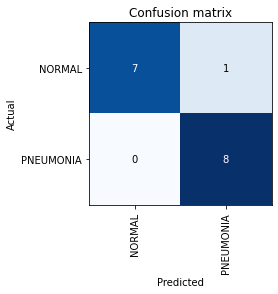

In [ ]:
interp.plot_confusion_matrix()

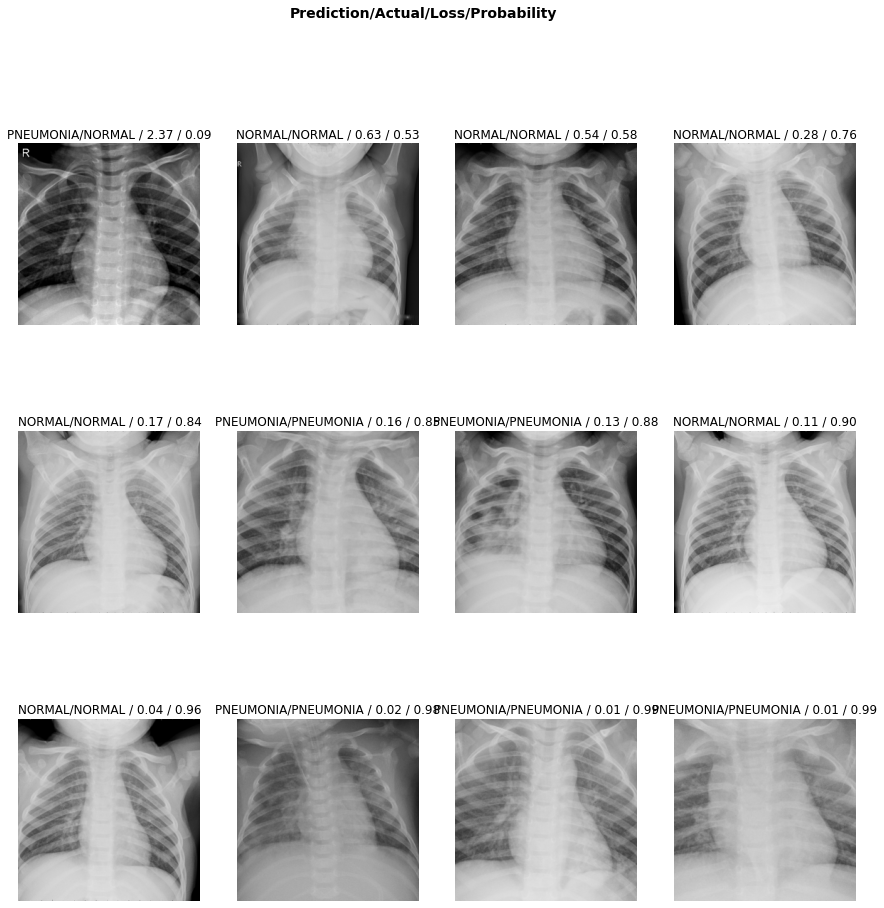

In [ ]:
interp.plot_top_losses(12, figsize=(15,15))